In [39]:
import numpy as np
import pandas as pd
data = pd.read_csv('tripv2pub.csv')
pd.set_option('display.max_columns',None)
data.describe()

,HOUSEID,PERSONID,TRIPID,SEQ_TRIPID,VEHCASEID,FRSTHM,PARK,HHMEMDRV,TDWKND,TRAVDAY,LOOP_TRIP,DWELTIME,PUBTRANS,TRIPPURP,WHYFROM,WHYTRP1S,TRVLCMIN,STRTTIME,ENDTIME,TRPHHVEH,VEHID,TRPTRANS,NUMONTRP,ONTD_P1,ONTD_P2,ONTD_P3,ONTD_P4,ONTD_P5,ONTD_P6,ONTD_P7,ONTD_P8,ONTD_P9,ONTD_P10,NONHHCNT,HHACCCNT,WHODROVE,DRVR_FLG,PSGR_FLG,WHODROVE_IMP,PARK2_PAMOUNT,PARK2_PAYTYPE,PARK2,WHYTO,WALK,TRPMILES,WTTRDFIN,WTTRDFIN5D,WTTRDFIN2D,TDCASEID,VMT_MILE,GASPRICE,WHYTRP90,NUMADLT,HOMEOWN,RAIL,CENSUS_D,CENSUS_R,HH_HISP,DRVRCNT,CDIVMSAR,HHFAMINC,HH_RACE,HHSIZE,HHVEHCNT,LIF_CYC,MSACAT,MSASIZE,URBAN,URBANSIZE,URBRUR,TDAYDATE,WRKCOUNT,STRATUMID,R_AGE,R_SEX,WORKER,DRIVER,R_RACE,R_HISP,PROXY,EDUC,PRMACT,R_SEX_IMP,VEHTYPE,HHFAMINC_IMP,OBHUR,DBHUR,TRIPMODE,OTHTNRNT,OTPPOPDN,OTRESDN,OTEEMPDN,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
count,3.107400e+04,31074.000000,31074.000000,31074.000000,3.107400e+04,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.00000,31074.000000,31074.000000,3.107400e+04,3.107400e+04,3.107400e+04,3.107400e+04,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000
mean,9.000116e+09,1.681438,2.437826,2.435702,7.619426e+11,1.048529,1.141308,0.775407,1.722276,3.810066,1.988704,95.176611,1.989026,3.156723,7.185943,26.856311,24.547821,1329.818337,1363.067613,1.041063,1.076945,3.906159,1.997265,1.243644,1.129336,0.185267,-0.226427,-0.644236,-0.880543,-0.954464,-0.976830,-0.993338,-0.999710,0.414140,1.583124,3.333526,0.986774,1.423505,3.786606,-0.802894,-0.986677,82.358853,7.43390,-0.210272,13.965150,8.166137e+06,5.815804e+06,2.302368e+06,9.000116e+13,7.246071,397.951262,5.351805,2.058506,1.654921,1.775729,5.143046,2.652346,1.924117,1.993242,53.722565,7.260636,2.677029,2.821941,2.134453,5.812737,2.292109,3.530926,1.653086,4.137478,1.188968,202211.691543,1.303694,1029.494240,46.800830,1.430617,1.126504,0.855892,2.859014,1.916071,1.268198,4.716097,4.710755,1.503926,1.724657,7.415814,3.039454,3.037910,1.678735,31.759896,4.147133,3.174776,4.903842,31.755970,4.202259,3.226395,31.789985,4.148227,3.176450,4.906900,31.790886,4.200071,3.222533
std,5.829379e+04,0.999429,1.791504,1.789758,3.243517e+11,0.214885,1.341822,0.787571,0.447884,1.966057,0.105681,164.311604,0.104181,1.445374,6.851472,27.561324,46.483373,422.927312,425.447364,0.514696,1.094555,5.054558,3.477865,0.429287,0.982799,1.336076,1.215187,0.911104,0.563497,0.351382,0.254039,0.137048,0.029476,3.387813,0.891605,14.903745,0.833239,0.975625,15.956259,8.739298,0.207546,909.149169,6.99431,4.073497,85.416700,1.083988e+07,9.561997e+06,5.831630e+06,5.829379e+08,27.585135,68.455342,4.189875,0.761605,0.813206,0.417108,2.485935,1.011683,0.264816,0.794912,24.895858,2.861425,11.855930,1.446787,1.078400,3.251390,0.856474,1.552468,1.166259,1.665612,0.391490,20.136521,0.947416,4.982031,20.765643,0.931312,0.872042,0.646882,12.512009,0.277285,0.443029,2.409187,19.318665,0.499993,1.567172,2.445626,1.322290,1.3380

In [60]:
np.random.seed(4)
zones = 10 
distdf = pd.DataFrame(index = [f'zone{i}' for i in range(1,zones+1)], columns=[f'zone{i}' for i in range(1,zones+1)])
distdf

def distance(i,j):
    if i == j:
        return round(np.random.uniform(1,3),1)
    else:
        base_distance = np.random.uniform(2,zones)
        difference_factor = abs(i-j) * 1.2
        return round(base_distance + difference_factor, 1)

for a in range(zones):
    for b in range(zones):
        if a <= b:
            distdf.iloc[a,b] = distance(a,b)
        else:
            distdf.iloc[a,b] = distdf.iloc[b,a]

# for a in range(zones):
#     for b in range(zones):
#         if a <= b:
#             distdf.iloc[a,b] = distance(a,b)
#         else:
#             distdf.iloc[a,b] = distdf.iloc[b,a]

distdf.info()
distdf = distdf.astype(float)
distdf

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, zone1 to zone10
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   zone1   10 non-null     object
 1   zone2   10 non-null     object
 2   zone3   10 non-null     object
 3   zone4   10 non-null     object
 4   zone5   10 non-null     object
 5   zone6   10 non-null     object
 6   zone7   10 non-null     object
 7   zone8   10 non-null     object
 8   zone9   10 non-null     object
 9   zone10  10 non-null     object
dtypes: object(10)
memory usage: 880.0+ bytes


,zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,zone9,zone10
zone1,2.9,7.6,12.2,11.3,12.4,9.7,17.0,10.4,13.6,16.3
zone2,7.6,2.6,4.8,11.3,13.5,8.1,12.8,9.3,13.5,12.0
zone3,12.2,4.8,2.9,6.7,12.0,11.9,13.7,9.4,9.8,15.2
zone4,11.3,11.3,6.7,1.3,9.1,7.7,9.8,14.3,12.2,10.1
zone5,12.4,13.5,12.0,9.1,1.3,7.6,8.6,10.7,10.0,13.2
zone6,9.7,8.1,11.9,7.7,7.6,1.8,8.2,10.5,7.0,9.8
zone7,17.0,12.8,13.7,9.8,8.6,8.2,2.0,8.7,6.4,10.0
zone8,10.4,9.3,9.4,14.3,10.7,10.5,8.7,2.2,10.4,7.3
zone9,13.6,13.5,9.8,12.2,10.0,7.0,6.4,10.4,2.3,4.7
zone10,16.3,12.0,15.2,10.1,13.2,9.8,10.0,7.3,4.7,2.0


In [ ]:
def generate_close(zones):
    num1 = np.random.randint(0,zones)
    alpha1 = np.random.randint(0,zones)
    
    if num1 > 4:
        if alpha1 < 7:
            num2 = np.random.randint(4,zones)
        else:
            num2 = np.random.randint(0,zones)
    elif num1 > 7:
        if alpha1 < 8:
            num2 = np.random.randint(6,zones)
        else:
            num2 = np.random.random(0,zones)
    else:
        if alpha1 < 5:
            num2 = np.random.randint(1,6)
        else:
            num2 = np.random.randint(0,zones)
    
    return num1, num2


In [62]:
new_col = {'O':[],'D':[]}

for i in range(data.shape[0]):
    num1,num2 = generate_close(zones)
    new_col['O'].append(num1)
    new_col['D'].append(num2)

data['O'] = new_col['O']
data['D'] = new_col['D']

data

,HOUSEID,PERSONID,TRIPID,SEQ_TRIPID,VEHCASEID,FRSTHM,PARK,HHMEMDRV,TDWKND,TRAVDAY,LOOP_TRIP,DWELTIME,PUBTRANS,TRIPPURP,WHYFROM,WHYTRP1S,TRVLCMIN,STRTTIME,ENDTIME,TRPHHVEH,VEHID,TRPTRANS,NUMONTRP,ONTD_P1,ONTD_P2,ONTD_P3,ONTD_P4,ONTD_P5,ONTD_P6,ONTD_P7,ONTD_P8,ONTD_P9,ONTD_P10,NONHHCNT,HHACCCNT,WHODROVE,DRVR_FLG,PSGR_FLG,WHODROVE_IMP,PARK2_PAMOUNT,PARK2_PAYTYPE,PARK2,WHYTO,WALK,TRPMILES,WTTRDFIN,WTTRDFIN5D,WTTRDFIN2D,TDCASEID,VMT_MILE,GASPRICE,WHYTRP90,NUMADLT,HOMEOWN,RAIL,CENSUS_D,CENSUS_R,HH_HISP,DRVRCNT,CDIVMSAR,HHFAMINC,HH_RACE,HHSIZE,HHVEHCNT,LIF_CYC,MSACAT,MSASIZE,URBAN,URBANSIZE,URBRUR,TDAYDATE,WRKCOUNT,STRATUMID,R_AGE,R_SEX,WORKER,DRIVER,R_RACE,R_HISP,PROXY,EDUC,PRMACT,R_SEX_IMP,VEHTYPE,HHFAMINC_IMP,OBHUR,DBHUR,TRIPMODE,OTHTNRNT,OTPPOPDN,OTRESDN,OTEEMPDN,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN,O,D
0,9000013002,1,1,1,900001300201,1,2,1,1,1,2,75,2,3,1,50,15,1435,1450,1,1,3,2,1,2,2,1,-1,-1,-1,-1,-1,-1,0,2,1,1,2,1,-1.0,-1,-1,15,2,3.902424,1.608362e+06,0.000000e+00,1.569852e+06,90000130020101,3.902424,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,39,2,2,1,1,2,1,7,3,2,3,11,4,4,1,20,4,2,5,5,4,3,5,5,3,6,5,4,3,7,8
1,9000013002,1,2,2,900001300201,1,2,1,1,1,2,-9,2,3,15,1,10,1605,1615,1,1,3,2,1,2,2,1,-1,-1,-1,-1,-1,-1,0,2,1,1,2,1,-1.0,-1,-1,1,1,3.902424,1.608362e+06,0.000000e+00,1.569852e+06,90000130020102,3.902424,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,39,2,2,1,1,2,1,7,3,2,3,11,4,4,1,5,5,3,6,5,4,3,20,4,2,5,5,4,3,6,4
2,9000013002,2,1,1,900001300202,1,-1,1,1,1,2,10,2,2,1,80,30,700,730,1,2,3,1,2,1,2,2,-1,-1,-1,-1,-1,-1,0,1,2,1,2,2,-1.0,-1,-1,12,-1,17.077067,2.208973e+06,0.000000e+00,2.274239e+06,90000130020201,17.077067,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,42,1,1,1,1,2,2,7,-1,1,3,11,4,2,1,20,4,2,5,5,4,3,40,5,4,6,60,4,3,8,5
3,9000013002,2,2,2,900001300202,1,-1,1,1,1,2,10,2,5,12,80,10,740,750,1,2,3,1,2,1,2,2,-1,-1,-1,-1,-1,-1,0,1,2,1,2,2,-1.0,-1,-1,12,-9,4.748291,2.208973e+06,0.000000e+00,2.274239e+06,90000130020202,4.748291,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,42,1,1,1,1,2,2,7,-1,1,3,11,2,2,1,40,5,4,6,60,4,3,5,3,2,4,5,3,2,5,6
4,9000013002,2,3,3,900001300202,1,-1,1,1,1,2,-9,2,2,12,1,30,800,830,1,2,3,1,2,1,2,2,-1,-1,-1,-1,-1,-1,0,1,2,1,2,2,-1.0,-1,-1,1,-9,14.098819,2.208973e+06,0.000000e+00,2.274239e+06,90000130020203,14.098819,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,42,1,1,1,1,2,2,7,-1,1,3,11,2,4,1,5,3,2,4,5,3,2,20,4,2,5,5,4,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31069,9000218013,1,2,2,900021801301,1,2,1,2,5,2,70,2,5,14,40,15,1320,1335,1,1,3,1,1,2,-1,-1,-1,-1,-1,-1,-1,-1,0,1,1,1,2,1,-1.0,-1,-1,13,2,3.295836,2.736726e+06,2.455057e+06,0.000000e+00,90002180130102,3.295836,305.3,3,2,1,2,6,3,2,1,63,3,1,2,1,10,3,1,1,1,1,202301,0,1031,78,2,2,1,1,2,1,7,5,2,3,3,2,2,1,20,4,3,4,30,4,3,20,4,3,5,1,3,2,4,1
31070,9000218013,1,3,3,900021801301,1,2,1,2,5,2,-9,2,2,13,1,15,1445,1500,1,1,3,1,1,2,-1,-1,-1,-1,-1,-1,-1,-1,0,1,1,1,2,1,-1.0,-1,-1,1,1,3.059043,2.736726e+06,2.455057e+06,0.000000e+00,90002180130103,3.059043,305.3,3,2,1,2,6,3,2,1,63,3,1,2,1,10,3,1,1,1,1,202301,0,1031,78,2,2,1,1,2,1,7,5,2,3,3,2,2,1,20,4,3,5,1,3,2,20,4,3,4,5,3,2,5,4
31071,9000218040,1,1,1,900021804001,1,2,1,2,5,2,6,2,4,1,40,4,1230,1234,1,1,4,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,1,1,1,2,1,-1.0,-1,-1,14,2,0.102548,4.729168e+06,3.804407e+06,0.000000e+00,90002180400101,0.102548,276.9,4,1,2,2,6,3,2,1,64,6,1,1,1,1,4,6,4,6,2,202212,1,1032,58,2,1,1,1,2,1,4,-1,2,4,6,1,1,1,50,1,1,1,50,2,1,50,1,1,1,50,2,1,7,6
31072,9000218040,1,2,2,900021804001,1,2,1,2,5,2,18,2,4,14,1,

In [64]:
curr_trip_distribute = data.groupby(['O','D']).size()
curr_trip_distribute

O  D
0  0    131
   1    458
   2    449
   3    477
   4    435
       ... 
9  5    446
   6    435
   7    480
   8    504
   9    449
Length: 100, dtype: int64

In [ ]:
curr_o = data.groupby('O').size()
curr_d = data.groupby('D').size()

zones = np.arange(zones)
future_o = dict.fromkeys(zones)
future_d = dict.fromkeys(zones)
sum_d = 0

for key in zones:
    future_o[key] = int(curr_o[key] + -1**np.random.randint(-2,4)* np.random.randint(1,200))
    if key < 9:
        future_d[key] = int(curr_d[key] + -1**np.random.randint(-2,4)* np.random.randint(1,200))
        sum_d = sum_d + future_d[key]
    else:
        future_d[key] = sum(future_o.values()) - sum_d

display(future_o,future_d)

{np.int64(0): 2967,
 np.int64(1): 3016,
 np.int64(2): 2911,
 np.int64(3): 3077,
 np.int64(4): 3127,
 np.int64(5): 2886,
 np.int64(6): 2962,
 np.int64(7): 3090,
 np.int64(8): 3037,
 np.int64(9): 3106}

{np.int64(0): 1097,
 np.int64(1): 2729,
 np.int64(2): 2581,
 np.int64(3): 2609,
 np.int64(4): 4538,
 np.int64(5): 4526,
 np.int64(6): 2876,
 np.int64(7): 3082,
 np.int64(8): 2985,
 np.int64(9): 3156}

In [ ]:
f_origin = np.array(list(future_o.values()))
f_destination = np.array(list(future_d.values()))
dist = distdf.to_numpy()


beta_impedance_fuction = 0.1
def deterrance_function(cij,beta):
    return np.exp(-beta*cij)
deter = deterrance_function(dist,beta_impedance_fuction)

In [87]:
def gravity(
    O,
    D,
    cost_matrix,
    deter_matrix,
    error_threshold = 0.01,
    improvement_threshold = 1e-4
):
    def format_matrix(matrix,matrix_name):
        matrix_size = matrix.shape[0]
        names = [f'zone{i}' for i in range(1, matrix_size + 1)]
        formatted_matrix = pd.DataFrame(matrix,index=names,columns=names)
        print(f'{matrix_name}:\n',formatted_matrix,'\n')
    
    format_matrix(cost_matrix,'initial matrix')
    format_matrix(deter_matrix,'deterrence matrix')

    num_o = np.sum(O)
    num_d = np.sum(D)

    if num_o != num_d:
        if num_o > num_d:
            ratio = num_o / num_d
            D = D *ratio
        else:
            ratio = num_d / num_o
            O = O*ratio

    n = len(O)
    T = np.sum(O)
    Ai = np.ones(n)
    Bj = np.ones(n)

    pre_error = np.inf
    initeration = 0

    while True:
        initeration += 1
        for i in range(n):
            Ai[i] = 1/(np.sum(Bj * D * deter_matrix[i,:]) + 1e-9)
        
        Bj_new = np.ones(n)

        for j in range(n):
            Bj_new[j] = 1/(np.sum(Ai * O * deter_matrix[:,j]) + 1e-9)
        
        Tij = np.outer(Ai*O , Bj_new*D) *deter_matrix

        error = (np.sum(np.abs(O - np.sum(Tij,axis=1)))+np.sum(D-np.sum(Tij,axis=0)))/T
        error_gap = pre_error - error

        if error < error_threshold:
            print('1')
            break
        elif error_gap < improvement_threshold:
            print('2')
            break
        
        pre_error = error
        Bj = Bj_new
    
    final_matrix = pd.DataFrame(
        Tij,
        columns=[f"Zone {i}" for i in range(1, n + 1)],
        index=[f"Zone {i}" for i in range(1, n + 1)],
    )

    final_matrix['O'] = np.sum(final_matrix, axis=1)
    final_matrix.loc['D'] = np.sum(final_matrix,axis=0)

    print(final_matrix.round(3))

In [88]:
solution_gravity = gravity(
    f_origin,
    f_destination,
    dist,
    deter,
    error_threshold = 0.01,
    improvement_threshold = 1e-4
)

initial matrix:
         zone1  zone2  zone3  zone4  zone5  zone6  zone7  zone8  zone9  zone10
zone1     2.9    7.6   12.2   11.3   12.4    9.7   17.0   10.4   13.6    16.3
zone2     7.6    2.6    4.8   11.3   13.5    8.1   12.8    9.3   13.5    12.0
zone3    12.2    4.8    2.9    6.7   12.0   11.9   13.7    9.4    9.8    15.2
zone4    11.3   11.3    6.7    1.3    9.1    7.7    9.8   14.3   12.2    10.1
zone5    12.4   13.5   12.0    9.1    1.3    7.6    8.6   10.7   10.0    13.2
zone6     9.7    8.1   11.9    7.7    7.6    1.8    8.2   10.5    7.0     9.8
zone7    17.0   12.8   13.7    9.8    8.6    8.2    2.0    8.7    6.4    10.0
zone8    10.4    9.3    9.4   14.3   10.7   10.5    8.7    2.2   10.4     7.3
zone9    13.6   13.5    9.8   12.2   10.0    7.0    6.4   10.4    2.3     4.7
zone10   16.3   12.0   15.2   10.1   13.2    9.8   10.0    7.3    4.7     2.0 

deterrence matrix:
            zone1     zone2     zone3     zone4     zone5     zone6     zone7  \
zone1   0.748264  0.467

In [96]:
solution_gravity = furness(dist, f_origin, f_destination, tolerance = 0.01)

              zone 1       zone 2       zone 3       zone 4       zone 5  \
zone 1     21.234291   164.180654   243.742338   243.248033   450.239065   
zone 2     67.752436    68.383811   116.757272   296.156247   596.797257   
zone 3    102.445384   118.916585    66.444944   165.401139   499.684106   
zone 4    109.742797   323.775999   177.543085    37.116931   438.248764   
zone 5    125.289157   402.433565   330.829650   270.311376    65.135369   
zone 6    108.185351   266.532621   362.138806   252.475116   420.331602   
zone 7    164.199254   364.754665   361.055699   278.278379   411.910095   
zone 8    100.916667   266.244799   248.879307   407.940407   514.867005   
zone 9    142.979669   418.733566   281.120706   377.073786   521.335269   
zone 10   154.254994   335.043736   392.488193   280.998585   619.451468   
Total D  1097.000000  2729.000000  2581.000000  2609.000000  4538.000000   

              zone 6       zone 7       zone 8       zone 9      zone 10  \
zone 1    4

In [95]:
def furness(origin_cost_matrix, future_sum_origin, future_sum_destination, tolerance=0.01):
    normal_tolerance = 9999
    error_list = []

    curr_matrix = origin_cost_matrix.copy()

    while normal_tolerance > tolerance:
        curr_row_sum = np.sum(curr_matrix,axis=1)
        row_factor = future_sum_origin / curr_row_sum
        scaled_matrix = curr_matrix*row_factor[:,np.newaxis]

        scaled_matrix_col = np.sum(scaled_matrix,axis=0)
        col_factor = future_sum_destination / scaled_matrix_col
        final_matrix = col_factor * scaled_matrix

        final_row = np.sum(final_matrix,axis=1)
        final_col = np.sum(final_matrix,axis=0)

        error = np.sum(np.abs(final_col - future_sum_destination)) + np.sum(np.abs(final_row - future_sum_origin))

        normal_tolerance = error/np.sum(future_sum_origin)
        error_list.append(normal_tolerance)
        curr_matrix = final_matrix
    
    dist_size = curr_matrix.shape[0]
    names = [f'zone {i}' for i in range(1, dist_size + 1)]
    final_matrix_df = pd.DataFrame(curr_matrix, index=names, columns=names)
    final_matrix_df['Total O'] = final_matrix_df.sum(axis=1)
    final_matrix_df.loc['Total D'] = final_matrix_df.sum()
    print(final_matrix_df)

    return final_matrix_df.round(3)
    

In [ ]:
# def furness(distcost, future_Origin, future_Destination, tolerance = 0.01):
#     normal_tolerance = 99999
#     dist_size = distcost.shape[0]
#     dist_name = [f'zone {i}' for i in range(1, dist_size+1)]

#     origin_data = pd.DataFrame(
#         distcost, index = dist_name, columns = dist_name
#     )

#     origin_data['O'] = origin_data.sum(axis=1)
#     origin_data.loc['D'] = origin_data.sum(axis=0)
#     error_list = []

#     while normal_tolerance > tolerance:
#         curr_row_nums = np.sum(distcost,axis=1)
#         relations_currrow = future_Origin/ curr_row_nums
#         curr_rows_matrix = distcost * relations_currrow[:, np.newaxis]

#         curr_col_nums = np.sum(distcost,axis=0)
#         relations_col = future_Destination / curr_col_nums
#         final_matrix = curr_rows_matrix * relations_col

#         final_matrix_col = np.sum(final_matrix, axis=0)
#         final_matrix_row = np.sum(final_matrix, axis=1)
#         error = np.sum(abs(final_matrix_col - future_Destination)) + np.sum(abs(final_matrix_row - future_Origin))
#         normal_tolerance = error/ np.sum(future_Origin)

#         error_list.append(normal_tolerance)
    
#     final_matrix_size = final_matrix.shape[0]
#     final_matrix_name = [f'zone {i}' for i in range(1, final_matrix_size + 1)]

#     final_matrix_df = pd.DataFrame(final_matrix,index = final_matrix_name,columns=final_matrix_name)
#     final_matrix_df['Total O'] = final_matrix_df.sum(axis=1)
#     final_matrix_df.loc['Total D'] = final_matrix_df.sum()

#     print(distcost)
#     print(final_matrix_df)
#     return final_matrix_df.round(3)

def furness(distcost, future_Origin, future_Destination, tolerance=0.01):
    normal_tolerance = 99999
    error_list = []

    # 保留干净的 distcost
    curr_matrix = distcost.copy()

    while normal_tolerance > tolerance:
        # 行约束
        curr_row_sums = np.sum(curr_matrix, axis=1)
        row_factors = future_Origin / curr_row_sums
        curr_matrix = curr_matrix * row_factors[:, np.newaxis]

        # 列约束
        curr_col_sums = np.sum(curr_matrix, axis=0)
        col_factors = future_Destination / curr_col_sums
        curr_matrix = curr_matrix * col_factors

        # 计算误差
        final_matrix_row = np.sum(curr_matrix, axis=1)
        final_matrix_col = np.sum(curr_matrix, axis=0)
        error = np.sum(abs(final_matrix_row - future_Origin)) + np.sum(abs(final_matrix_col - future_Destination))
        normal_tolerance = error / np.sum(future_Origin)

        error_list.append(normal_tolerance)

    # 输出结果 DataFrame
    dist_size = curr_matrix.shape[0]
    names = [f'zone {i}' for i in range(1, dist_size + 1)]
    final_matrix_df = pd.DataFrame(curr_matrix, index=names, columns=names)
    final_matrix_df['Total O'] = final_matrix_df.sum(axis=1)
    final_matrix_df.loc['Total D'] = final_matrix_df.sum()

    return final_matrix_df.round(3)


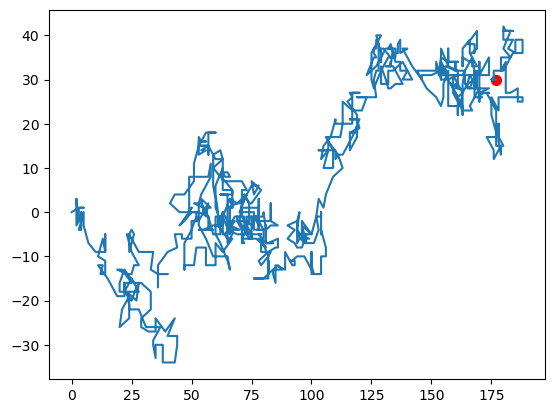

In [14]:
# from random import choice
# import matplotlib.pyplot as plt

# class randomwalk:
#     def __init__(self,num = 10000):
#         self.num = num
#         self.x_pos = [0]
#         self.y_pos = [0]
    
#     def steps(self):
#         distance = choice([0,1,2,3,4])
#         direction = choice([-1,0,1])
#         step = distance * direction
#         return step
    
#     def walk(self):
#         while len(self.x_pos) < self.num:
#             x_position = self.steps()
#             y_position = self.steps()
        
#             x = self.x_pos[-1] + x_position
#             y = self.y_pos[-1] + y_position

#             self.x_pos.append(x)
#             self.y_pos.append(y)

#     def get_info(self):
#         self.x_posini = self.x_pos[0]
#         self.y_posini = self.y_pos[0]
#         self.x_posend = self.x_pos[-1]
#         self.y_posend = self.y_pos[-1]
#         self.x_min = min(self.x_pos)
#         self.y_min = min(self.y_pos)
#         self.x_max = max(self.x_pos)
#         self.y_max = max(self.y_pos)
#         return self.x_posini, self.y_posini, self.x_posend, self.y_posend, self.x_min, self.y_min, self.x_max, self.y_max

# a = randomwalk()
# a.walk()
# display(a.get_info())

# plt.plot(a.x_pos,a.y_pos,linestyle='--',color='g')
# plt.scatter(a.x_posini,a.x_posini,marker='o',s=50,color='r')
# plt.scatter(a.x_posend,a.y_posend,marker='o',s=50,color='b')
# plt.show()


from random import choice
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class random:
    def __init__(self,num=1000):
        self.x_pos = [0]
        self.y_pos = [0]
        self.num = num
    
    def step(self):
        distance = choice([0,1,2,3,4])
        direction = choice([-1,0,1])
        steps = distance * direction
        return steps
    
    def walk(self):
        while len(self.x_pos) < self.num:
            x_dis = self.step()
            y_dis = self.step()
            y_increase = self.y_pos[-1] + y_dis
            x_increase = self.x_pos[-1] + x_dis

            self.x_pos.append(x_increase)
            self.y_pos.append(y_increase)

a = random()
a.walk()
plt.plot(a.x_pos,a.y_pos)
plt.scatter(a.x_pos[-1],a.y_pos[-1],s=50,c='r')

In [ ]:
def gravity(
    O,
    D,
    dist,
    deter,
    error_req = 0.001,
    improvement_bar = 1e-5
):
    def format_matrix(matrix,matrix_name):
        matrix_size = matrix.shape[0]
        names = [f'zone{i}' for i in matrix_size]
        formated_matrix = pd.DataFrame(
            matrix, index = names, columns = names
        )
        print(f'{matrix_name}:\n',f'{formated_matrix}\n')

    format_matrix(dist,'initial OD matrix')
    format_matrix(deter,'deterrance matrix')

    num_O = np.sum(O)
    num_D = np.sum(D)

    if num_O != num_D:
        if num_O > num_D:
            scaled_ratio = num_O/num_D
            D = D * scaled_ratio
        else:
            scaled_ratio = num_D/num_O
            O = O * scaled_ratio
    
    length = len(O)
    T = np.sum(O)
    pre_error = np.inf
    Ai = np.ones(length)
    Bj = np.ones(length)
    itineration = 0

    while True:
        itineration += 1
        for i in range(length):
            Ai[i] = 1/(np.sum(Bj * D * deter[i,:]))
        
        Bj_new = np.ones(length)
        for j in range(length):
            Bj_new[j] = 1/(np.sum(Ai * O *deter[:,j]))
        
        Tij = np.outer(Ai*O,Bj_new*D)*deter

        error = (np.sum(np.abs(O - np.sum(Tij,axis=1)))+np.sum(D-np.sum(Tij,axis=0)))/T
        error_gap = abs(pre_error - error)
        
        if error < error_req:
            break
        if error_gap < improvement_bar:
            break
        
        Bj = Bj_new
        pre_error = error